In [1]:
!pip install gms

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

import copy

from statistics import mode
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score

from gms.GMSModule import GMSModule

In [3]:
data = pd.read_csv('/kaggle/input/telecom-churn/telecom_churn.csv')
data.sample(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1586,0,89,1,0,0.0,1,82.3,77,29.0,8.36,7.2
2115,1,138,0,0,0.0,0,196.2,129,49.0,8.83,15.2
2382,0,123,1,0,0.0,0,154.3,107,42.0,9.15,10.9


<Axes: xlabel='Churn', ylabel='Count'>

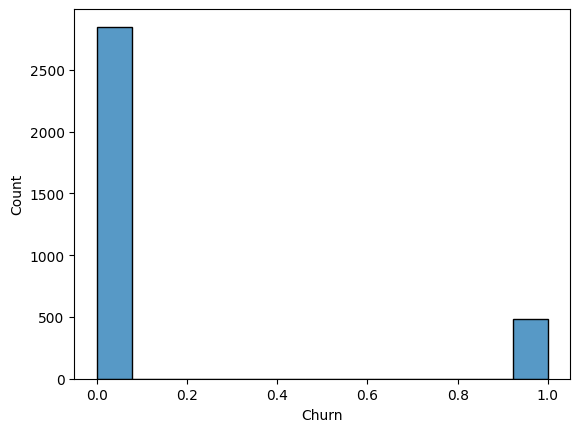

In [5]:
sns.histplot(data['Churn'])

In [6]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [7]:
X = RobustScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [9]:
data = [X_train, X_test, y_train, y_test]
models = [LogisticRegression(), KNeighborsClassifier(), LGBMClassifier()]

In [10]:
MyPipe = GMSModule(mode='classification', include=models, data=data, metrics=['accuracy', 'f1-score'], pivot='f1-score')

In [11]:
MyPipe.describe()

Evaluating Each Model: 100%|██████████| 3/3 [00:00<00:00,  3.05 eval./s]

==== DESCRIPTION ====

Evaluation mode: classification

From models selected: [LogisticRegression(), KNeighborsClassifier(), LGBMClassifier()]

Pivot selected: f1-score

Metrics for evaluation: ['accuracy', 'f1-score']


# 1. Evaluation metrics for each model passed into the object for | TRAIN / TEST:

Models (train)          Metrics (train)
----------------------  ----------------------------------------------------------------
LogisticRegression()    {'accuracy': 0.858589647411853, 'f1-score': 0.2873345935727788}
KNeighborsClassifier()  {'accuracy': 0.9246061515378845, 'f1-score': 0.6763285024154588}
LGBMClassifier()        {'accuracy': 0.9988747186796699, 'f1-score': 0.9961880559085133} 


Models (test)           Metrics (test)
----------------------  ----------------------------------------------------------------
LogisticRegression()    {'accuracy': 0.8740629685157422, 'f1-score': 0.3}
KNeighborsClassifier()  {'accuracy': 0.904047976011994, 'f1-score': 0.5294117647058824}
LGBMClas

```python
Models (test)             Metrics (test)
------------------------  ----------------------------------------------------------------
LogisticRegression()      {'accuracy': 0.8740629685157422, 'f1-score': 0.3}
RandomForestClassifier()  {'accuracy': 0.9385307346326837, 'f1-score': 0.7544910179640718}
ExtraTreesClassifier()    {'accuracy': 0.9310344827586207, 'f1-score': 0.7124999999999999}
KNeighborsClassifier()    {'accuracy': 0.904047976011994, 'f1-score': 0.5294117647058824}
```

In [98]:
data_copy = data
data_copy.sample(1)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2442,0,82,1,1,1.27,3,232.6,121,65.7,7.66,4.7


In [99]:
X, y = data_copy.drop(columns=['Churn']), data_copy.Churn

In [100]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [101]:
for model in models:
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        (str(model), model)
    ])
    
    pipe.fit(X_tr, y_tr)
    
    X_tr[str(model)] = pipe.predict(X_tr)
    X_t[str(model)] = pipe.predict(X_t)

In [102]:
X_tr

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,LogisticRegression(),KNeighborsClassifier()
1460,80,1,0,0.00,3,198.1,160,47.0,7.84,9.3,0,0
2000,28,1,0,0.00,3,168.2,87,43.0,8.09,10.1,0,0
666,120,1,0,0.00,2,252.0,120,56.0,7.51,9.6,0,0
2962,105,1,0,0.00,1,251.6,88,58.0,8.76,5.4,0,0
2773,134,1,1,1.65,2,247.2,105,78.5,11.28,6.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,27,1,0,0.00,1,72.7,75,31.0,10.43,9.9,0,0
3264,89,1,1,1.59,0,97.8,98,50.9,10.36,5.9,0,0
1653,93,0,0,0.00,1,131.4,78,42.0,10.99,11.1,0,0
2607,91,1,0,0.00,3,189.3,100,53.0,11.97,9.9,0,0


In [103]:
rfc_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('rfc', RandomForestClassifier())
])

rfc_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()), ('rfc', RandomForestClassifier())])

In [104]:
accuracy_score(y_t, rfc_pipe.predict(X_t))

0.9340329835082459

In [105]:
f1_score(y_t, rfc_pipe.predict(X_t))

0.7250000000000001

In [106]:
lgbm_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('lgbm', LGBMClassifier())
])

lgbm_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()), ('lgbm', LGBMClassifier())])

In [107]:
accuracy_score(y_t, lgbm_pipe.predict(X_t))

0.9295352323838081

In [108]:
f1_score(y_t, lgbm_pipe.predict(X_t))

0.7044025157232705

___

# Voting Algorithm

In [4]:
data_copy = pd.read_csv('/kaggle/input/telecom-churn/telecom_churn.csv')
X, y = data_copy.drop(columns=['Churn']), data_copy.Churn

X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [9]:
models = [LogisticRegression(), ExtraTreesClassifier(), RandomForestClassifier(), SVC(), LGBMClassifier()]

In [12]:
df = pd.DataFrame()


for model in models:
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        (str(model), model)
    ])
    
    pipe.fit(X_tr, y_tr)
    
    df[str(model)] = pipe.predict(X_t)

In [13]:
df

,LogisticRegression(),ExtraTreesClassifier(),RandomForestClassifier(),SVC(),LGBMClassifier()
0,0,1,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
662,0,0,0,0,0
663,0,0,0,0,0
664,0,0,0,0,0
665,0,0,0,0,0


In [29]:
preds = []
for i in range(df.shape[0]):
    preds.append(mode(df.iloc[i, :].tolist()))

In [33]:
print("Accuracy: %f" % accuracy_score(y_t, preds))
print("F1-score: %f" % f1_score(y_t, preds))

Accuracy: 0.932534
F1-score: 0.709677
